# CUNEF MUCD 2021/2022  
## Machine Learning
## Análisis de Siniestralidad de Automóviles

### Autores:
- Andrés Mahía Morado
- Antonio Tello Gómez


In [3]:
# Manipulacion
import pandas as pd
import numpy as np

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
#from matplotlib_dashboard import MatplotlibDashboard
# Métricas 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix # Matriz confusion
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve
from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import pickle
import re
import warnings
warnings.filterwarnings('ignore')
%load_ext autotime

from aux_func import cargar_modelo
from aux_func import evaluate_model
from aux_func import model_analysis

time: 0 ns (started: 2021-12-15 21:48:42 +01:00)


# Cargamos datos

In [3]:
# Load train and test data
xtrain = pd.read_parquet("../data/xtrain.parquet")
ytrain = pd.read_parquet("../data/ytrain.parquet")
xtest = pd.read_parquet("../data/xtest.parquet")
ytest = pd.read_parquet("../data/ytest.parquet")

time: 1.44 s


In [15]:
# Load model data
base = cargar_modelo("../models/modelo_base.pickle")
naive_bayes = cargar_modelo("../models/GNB.pickle")
selected_feat = cargar_modelo('../models/selected_feat.pickle')
logistic_ridge = cargar_modelo("../models/LR.pickle")
logistic_lasso = cargar_modelo("../models/LRlasso.pickle")
random_forest = cargar_modelo("../models/RandomForest.pickle")
xgboost = cargar_modelo("../models/XGBoost.pickle")
lightgbm = cargar_modelo("../models/LightGBM.pickle")
adaboost = cargar_modelo("../models/AdaBoost.pickle")
catboost = cargar_modelo("../models/CatBoost.pickle")

time: 4.88 s


# Selección de Modelos

En este apartado utilizaremos la función model_analysis que hemos creado para este trabajo, la cual nos permitirá observar para cada uno de los modelos que hemos generado las siguientes características:

- Curva ROC del modelo

- Curva ROC del modelo + ajuste de threshold representado visualmente

- Classification report

- Matrices de confusión del modelo (normalizada y no normalizada)

## Modelo base 

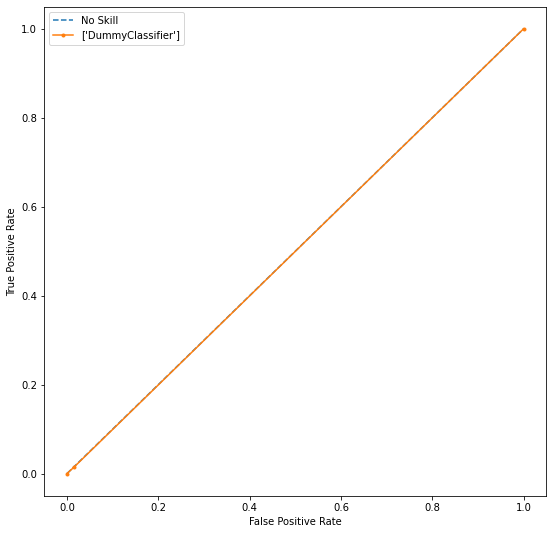

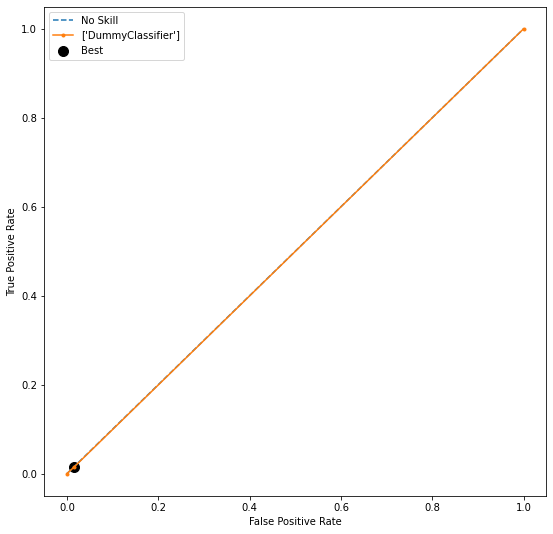

ROC-AUC score of the model: 0.49958685184478924
Accuracy of the model: 0.9847371212053883

Classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    997197
           1       0.00      0.00      0.00     15456

    accuracy                           0.98   1012653
   macro avg       0.49      0.50      0.50   1012653
weighted avg       0.97      0.98      0.98   1012653


Confusion matrix: 
[[997197      0]
 [ 15456      0]]



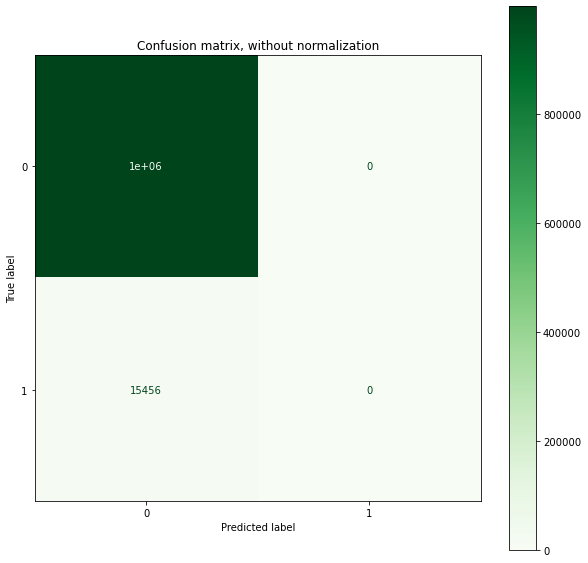

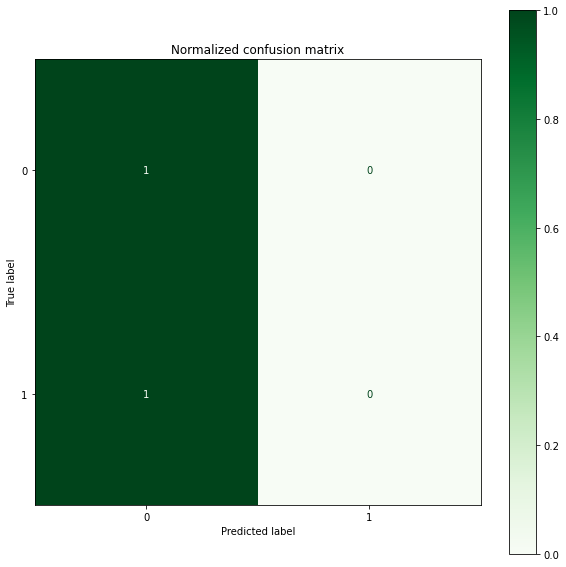

time: 8.59 s


In [17]:
model_analysis(base, xtest, ytest)

## Naive-Bayes

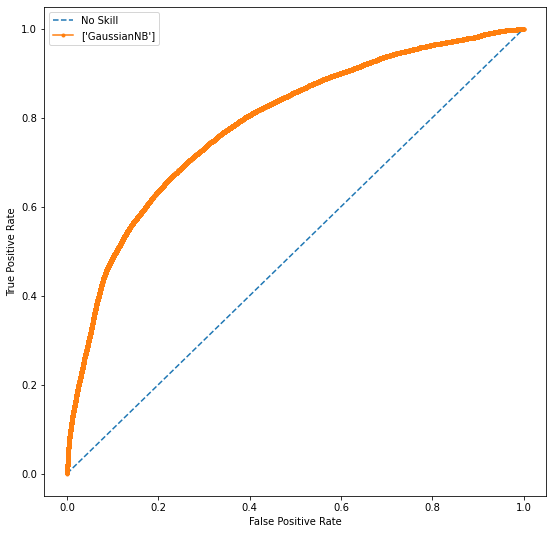

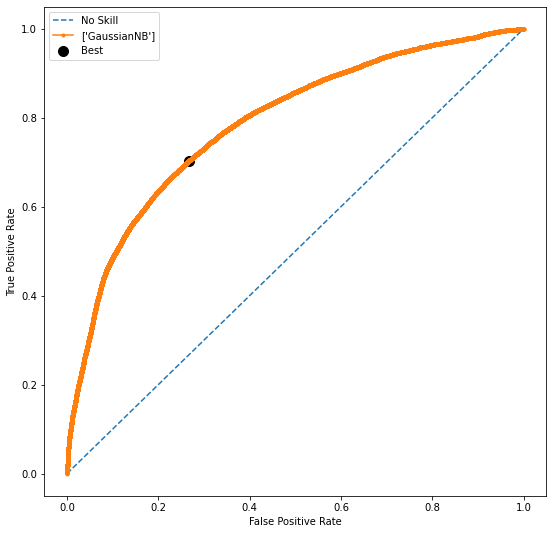

ROC-AUC score of the model: 0.7873892350291511
Accuracy of the model: 0.732287367933537

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.73      0.84    997197
           1       0.04      0.70      0.07     15456

    accuracy                           0.73   1012653
   macro avg       0.52      0.72      0.46   1012653
weighted avg       0.98      0.73      0.83   1012653


Confusion matrix: 
[[730680 266517]
 [  4583  10873]]



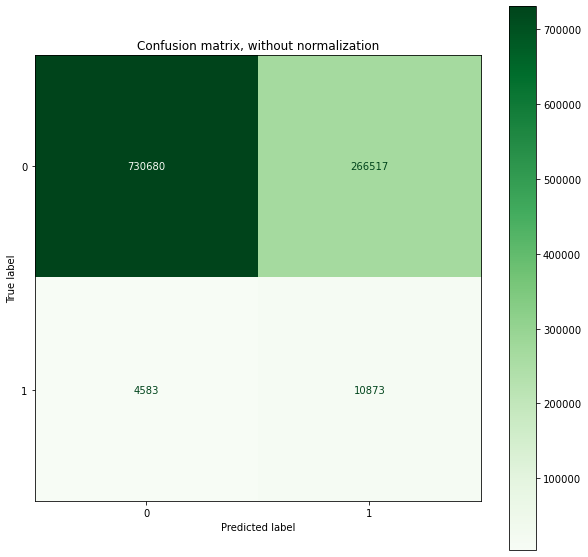

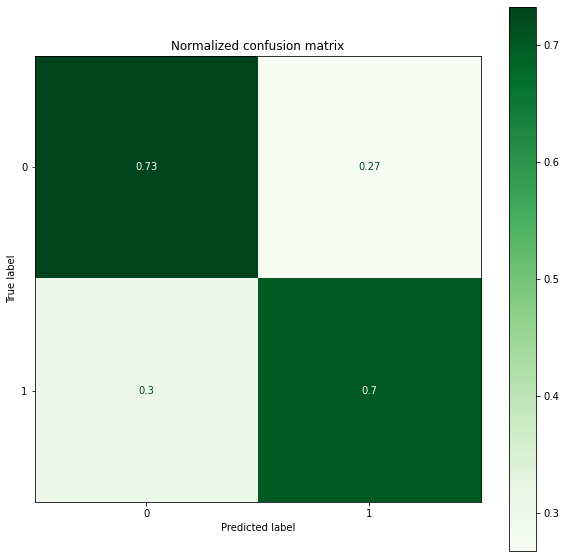

time: 8.03 s


In [18]:
model_analysis(naive_bayes, xtest, ytest)

## Regresión Logística (Ridge)

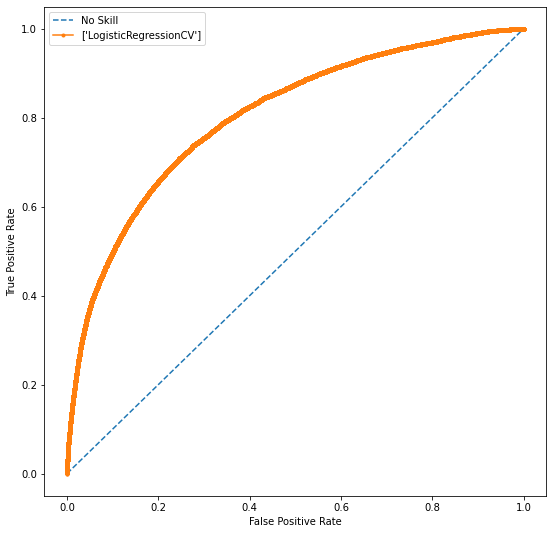

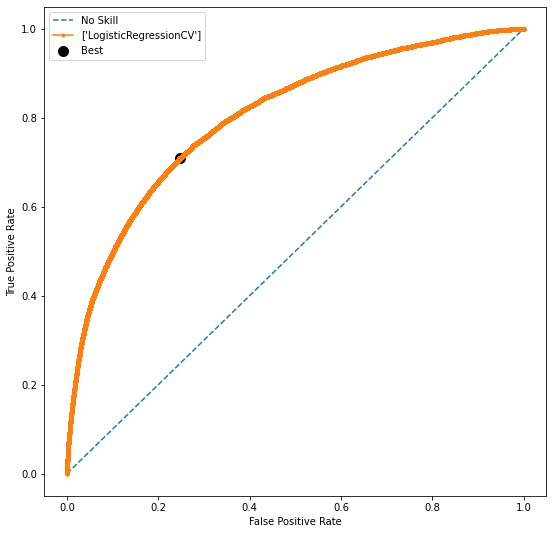

ROC-AUC score of the model: 0.8039610966391799
Accuracy of the model: 0.7528343865075203

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.75      0.86    997197
           1       0.04      0.71      0.08     15456

    accuracy                           0.75   1012653
   macro avg       0.52      0.73      0.47   1012653
weighted avg       0.98      0.75      0.85   1012653


Confusion matrix: 
[[751408 245789]
 [  4504  10952]]



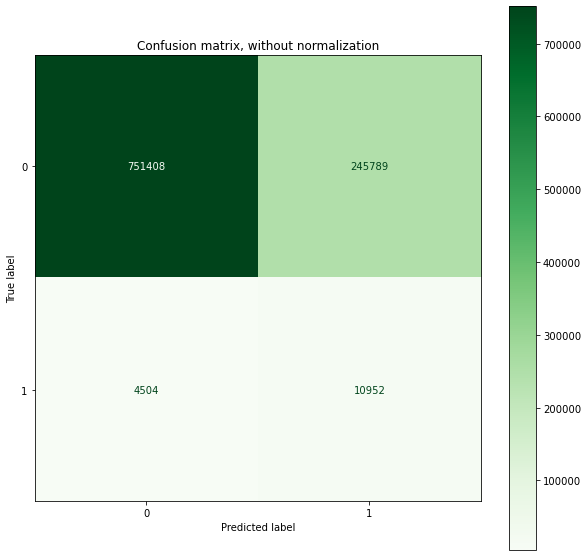

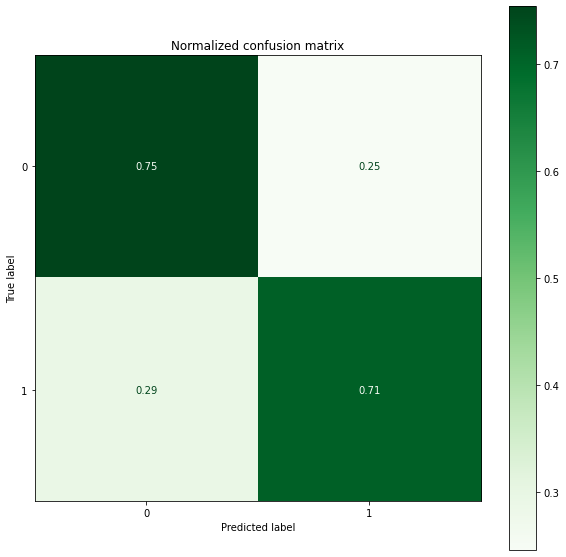

time: 6.99 s


In [19]:
model_analysis(logistic_ridge, xtest[selected_feat], ytest)

## Regresión Logística (Lasso)

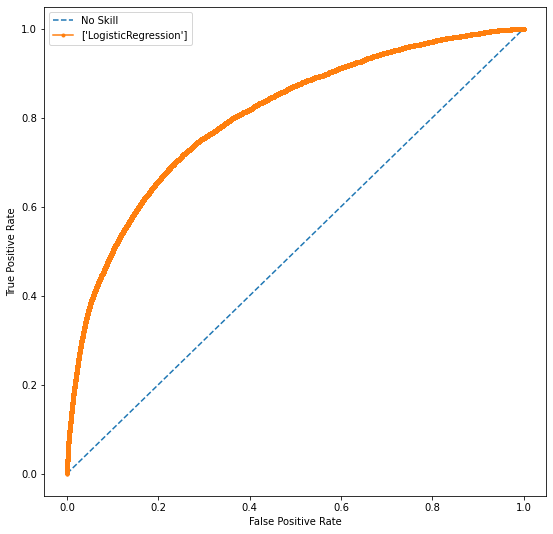

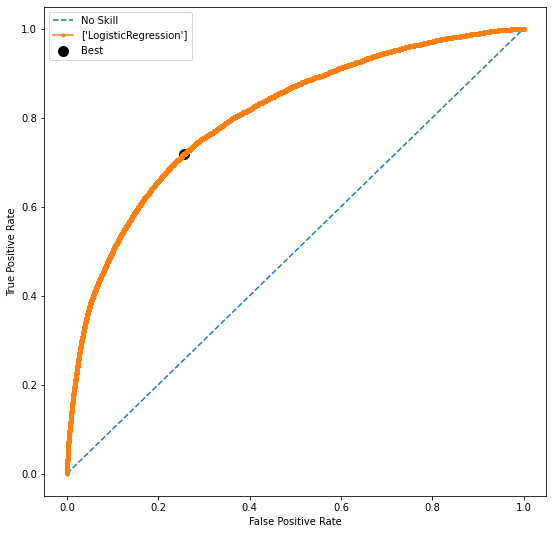

ROC-AUC score of the model: 0.8030306526185651
Accuracy of the model: 0.7440455911353643

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.74      0.85    997197
           1       0.04      0.72      0.08     15456

    accuracy                           0.74   1012653
   macro avg       0.52      0.73      0.47   1012653
weighted avg       0.98      0.74      0.84   1012653


Confusion matrix: 
[[742355 254842]
 [  4351  11105]]



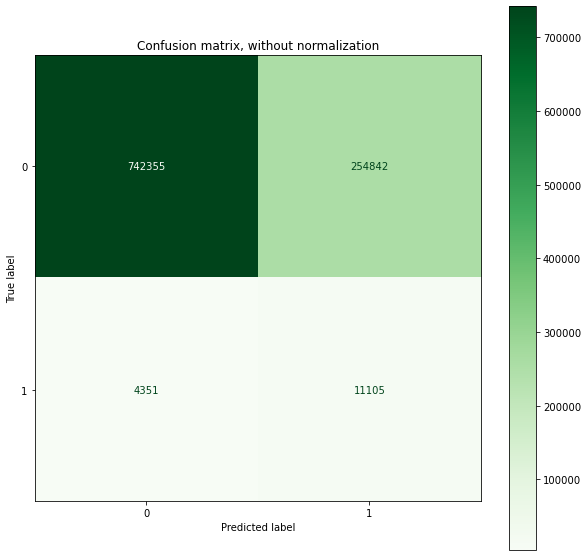

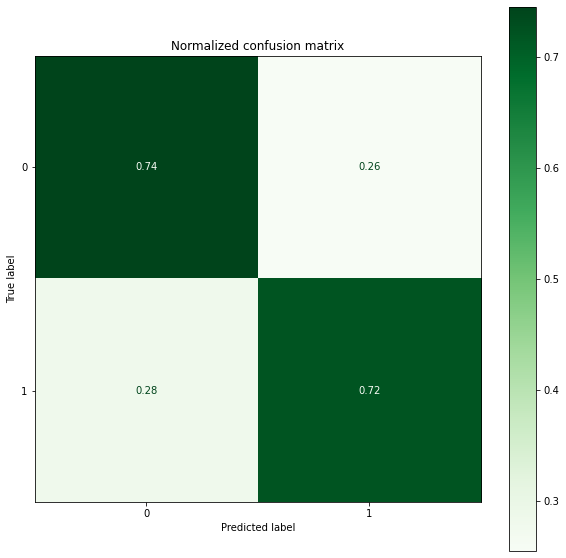

time: 6.82 s


In [20]:
model_analysis(logistic_lasso, xtest[selected_feat], ytest)

## Random Forest

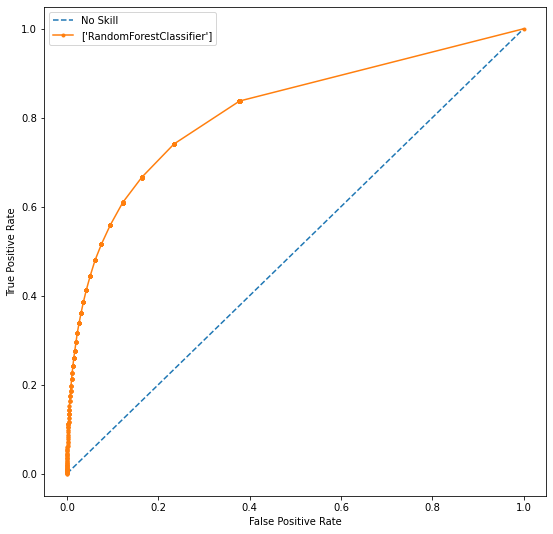

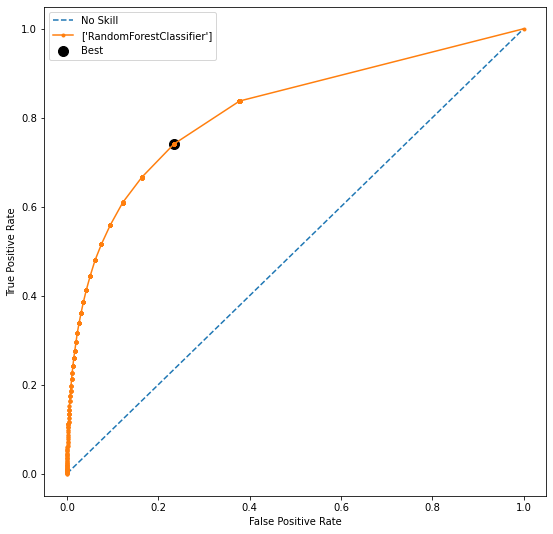

ROC-AUC score of the model: 0.8150581035488025
Accuracy of the model: 0.7658821757710567

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.77      0.87    797650
           1       0.05      0.74      0.09     12472

    accuracy                           0.77    810122
   macro avg       0.52      0.75      0.48    810122
weighted avg       0.98      0.77      0.85    810122




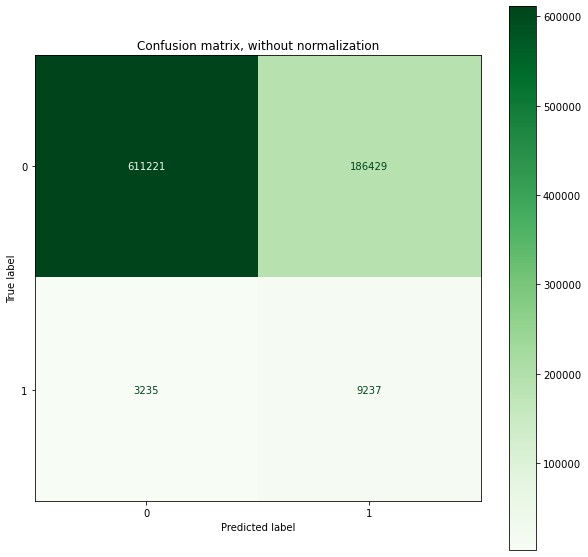

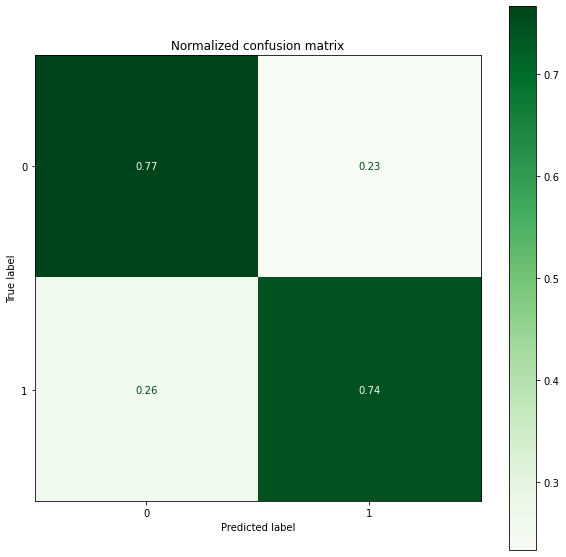

time: 14.8 s (started: 2021-12-12 19:40:56 +01:00)


In [104]:
model_analysis(random_forest, xtest, ytest)

## XGBoost

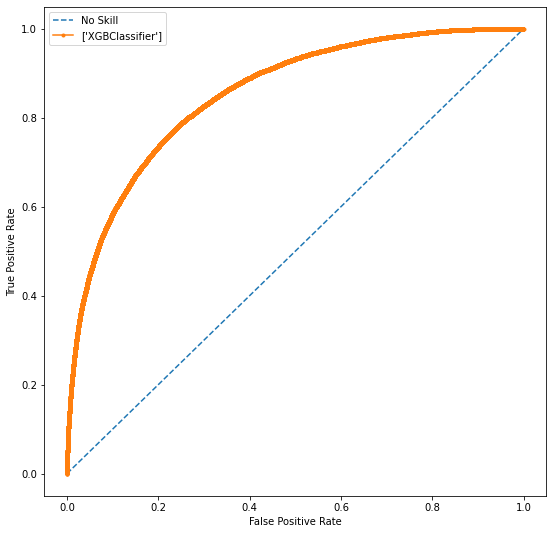

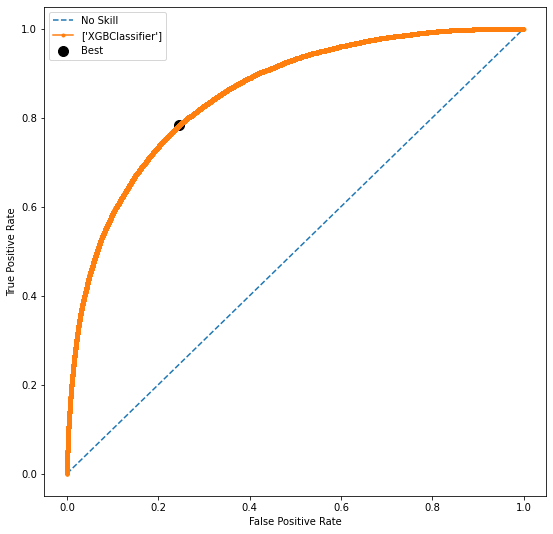

ROC-AUC score of the model: 0.8536524588223738
Accuracy of the model: 0.7553183347693311

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.75      0.86    797650
           1       0.05      0.78      0.09     12472

    accuracy                           0.76    810122
   macro avg       0.52      0.77      0.47    810122
weighted avg       0.98      0.76      0.85    810122




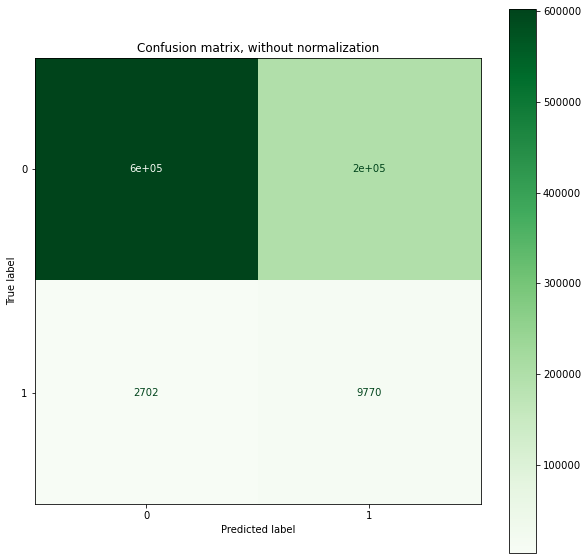

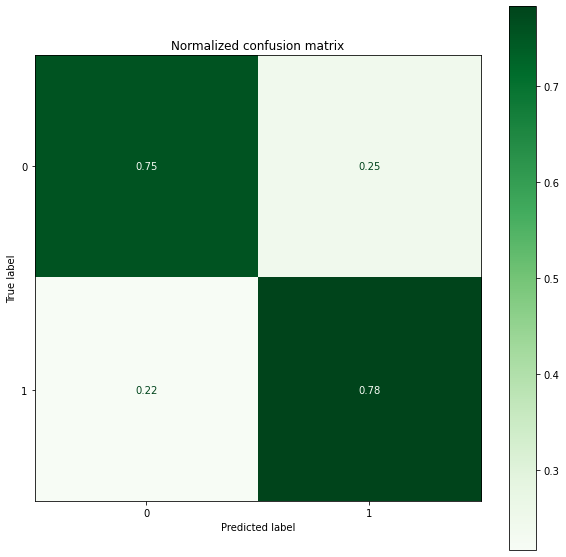

time: 3.98 s (started: 2021-12-12 19:41:11 +01:00)


In [105]:
model_analysis(xgboost, xtest, ytest)

## LightGBM

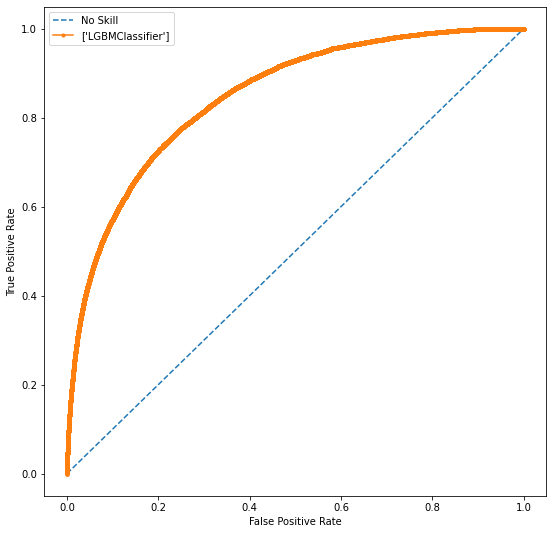

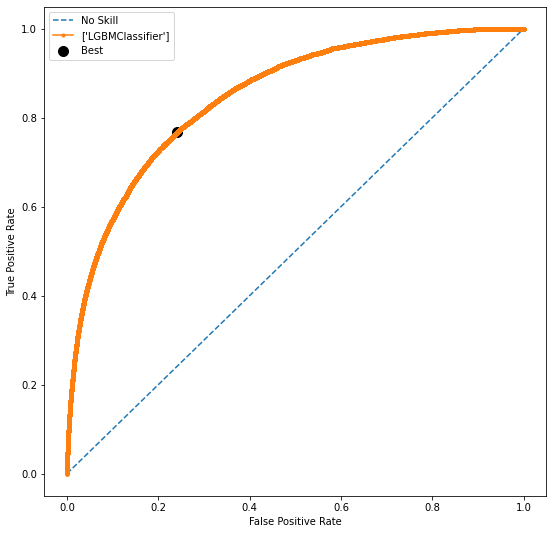

ROC-AUC score of the model: 0.8485746431939847
Accuracy of the model: 0.7598337040593885

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.76      0.86    797650
           1       0.05      0.77      0.09     12472

    accuracy                           0.76    810122
   macro avg       0.52      0.76      0.48    810122
weighted avg       0.98      0.76      0.85    810122




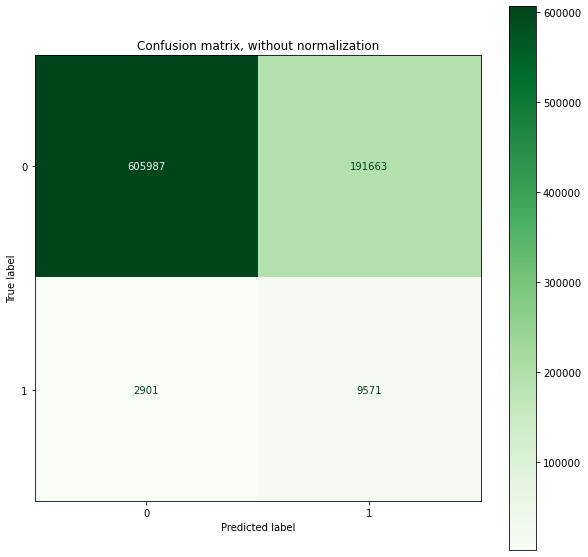

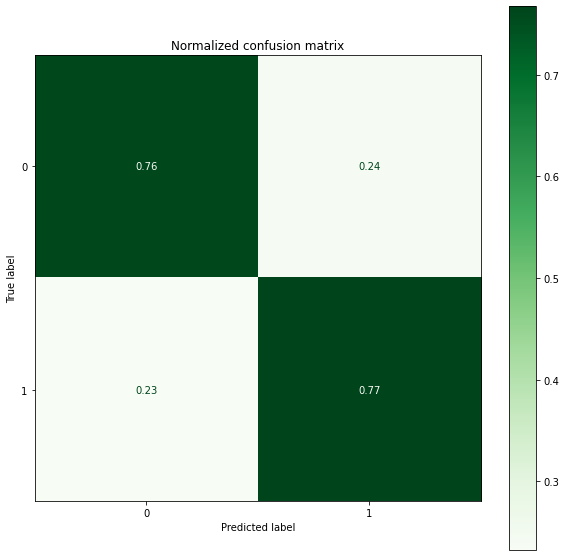

time: 4.99 s (started: 2021-12-12 19:41:15 +01:00)


In [106]:
model_analysis(lightgbm, xtest, ytest)

## ADABoost

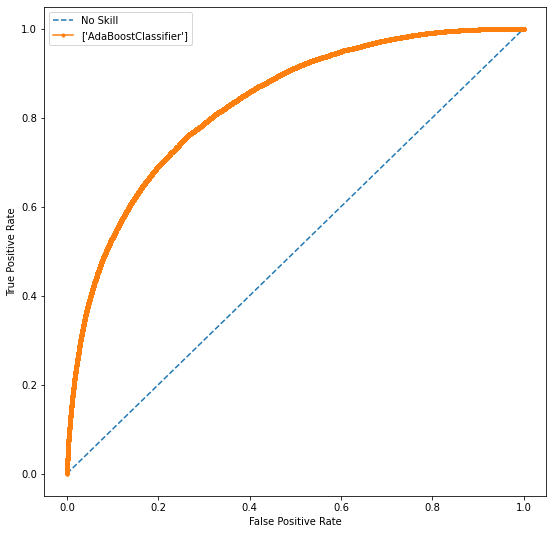

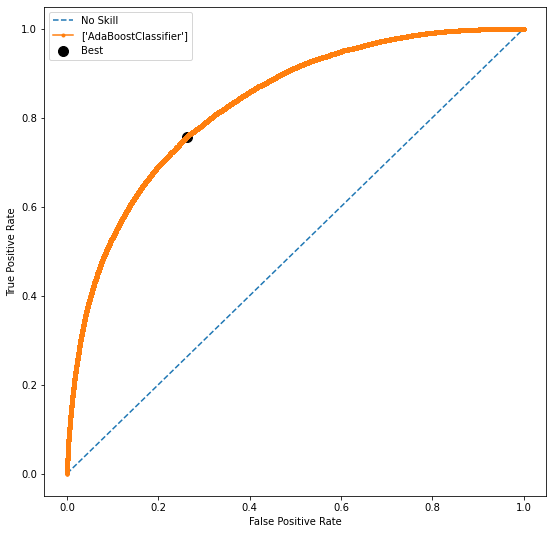

ROC-AUC score of the model: 0.8305004665726097
Accuracy of the model: 0.7373383268199111

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.74      0.85    797650
           1       0.04      0.76      0.08     12472

    accuracy                           0.74    810122
   macro avg       0.52      0.75      0.46    810122
weighted avg       0.98      0.74      0.83    810122




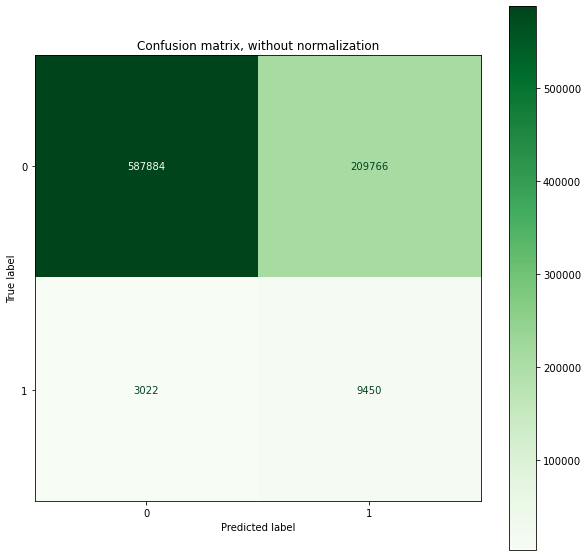

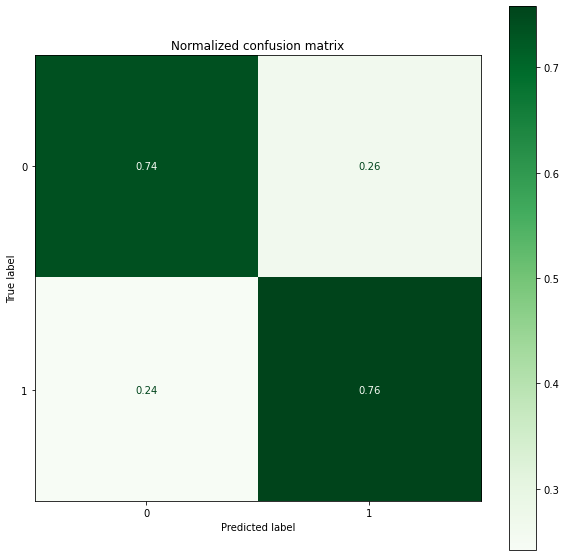

time: 45.6 s (started: 2021-12-12 19:41:20 +01:00)


In [107]:
model_analysis(adaboost, xtest, ytest)

## CatBoost

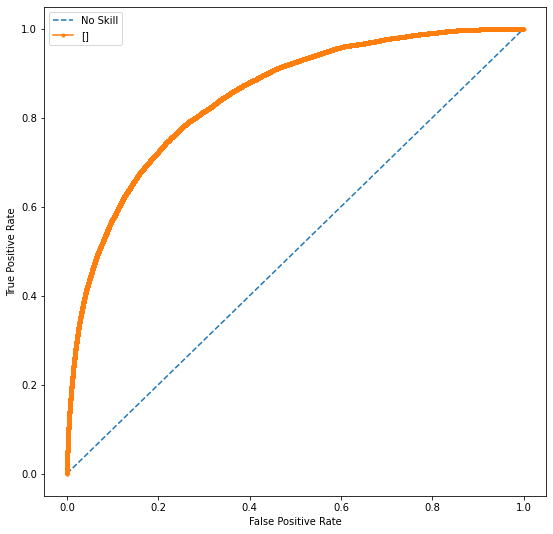

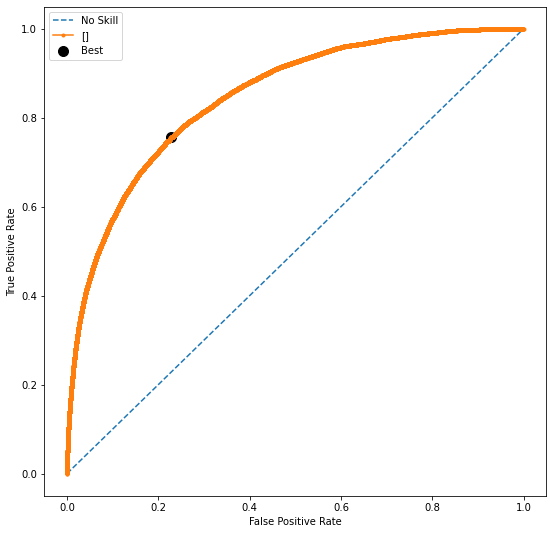

ROC-AUC score of the model: 0.8477362636504353
Accuracy of the model: 0.7712060652593066

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.77      0.87    797650
           1       0.05      0.76      0.09     12472

    accuracy                           0.77    810122
   macro avg       0.52      0.76      0.48    810122
weighted avg       0.98      0.77      0.86    810122




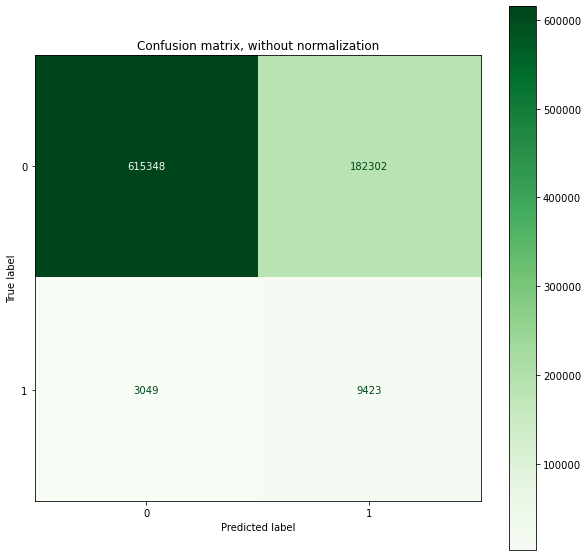

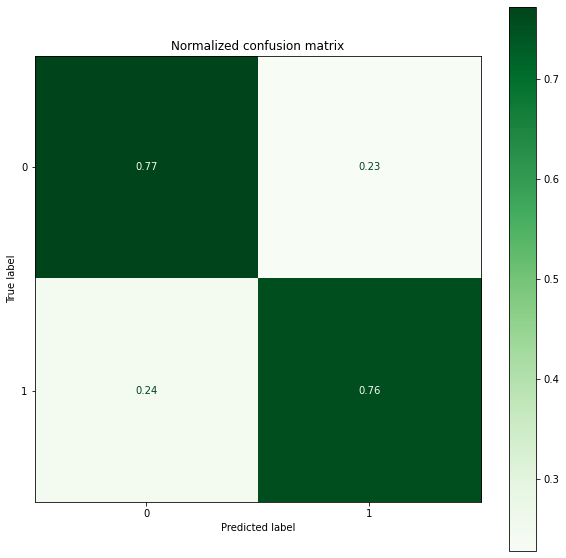

time: 3.12 s (started: 2021-12-12 19:42:05 +01:00)


In [108]:
model_analysis(catboost, xtest, ytest)

## Resumen comparativo

In [4]:
# Tabla con los datos de cada modelo

datos_modelos = {'Modelo': ['Modelo base', 'Naive-Bayes', 'Ridge', 'Lasso', 'Random Forest','XGBoost','LightGBM', 'ADABoost', 'Catboost'],
                
                'Accuracy': ['0.98', '0.73', '0.75', '0.74', '0.77', '0.76', '0.76', '0.74', '0.77'],
                
                'ROC-AUC': ['0.5', '0.78', '0.80', '0.80', '0.82', '0.85', '0.85', '0.83', '0.85'],
                
                'False positives': ['0', '0.27', '0.25', '0.26', '0.23', '0.25', '0.24', '0.26', '0.23'],
                
                'True positives': ['0', '0.70', '0.71', '0.72', '0.74', '0.78', '0.77', '0.76', '0.76'],
                
                'Runtime (s)':['1', '6', '816', '102', '260', '141', '15', '562', '196']}

tabla_modelos = pd.DataFrame(datos_modelos, columns=['Modelo', 'Accuracy', 'ROC-AUC', 'False positives',
                                                    'True positives', 'Runtime (s)'])

time: 0 ns (started: 2021-12-15 21:48:50 +01:00)


Hemos generado una tabla que nos permite realizar una comparación de los resultados y componentes principales a la hora de evaluar los modelos para nuestro caso en concreto.
Es necesario recordar que el objetivo de este trabajo es tratar de predecir la mortalidad en accidentes de tráfico, lo cual nos coloca en un entorno con un dataset extremadamente desbalanceado.

Como consecuencia de este desbalanceo, las métricas que debemos utilizar para evaluar la calidad de nuestras predicciones se ven alteradas respecto de un caso de clasificación más balanceado.
Hemos seleccionado los siguientes valores de cada modelo:

- **Accuracy**: Porcentaje total de los valores que ha sido predicho correctamente. No debemos darle una importancia desmesurada ya que al tratarse de una clasificación desbalanceada no tiene por qué significar la superioridad de un modelo en concreto.

- **ROC-AUC**: Área por debajo de la curva ROC. A mayor valor del ROC-AUC, mayor es el cociente entre los *true positives* y los *false positives*. Evaluaremos de manera positiva tener un mayor ROC-AUC.

- **False positive rate**: El porcentaje de valores (dentro del total de valores negativos) que clasificamos desde nuestro modelo como positivos, pero resultan ser negativos. Lo evaluaremos de manera negativa.

- **True positive rate**: El porcentaje de valores (dentro del total de valores positivos) que clasificamos como positivos. Lo evaluaremos de manera positiva.

- **Runtime o tiempo de ejecución**: Representa el tiempo que ha tardado el modelo en ajustarse a los datos de entrenamiento. Evaluaremos de manera negativa tener un mayor tiempo de ejecución.


![Highway](https://camo.githubusercontent.com/716b289f76220a2f1e3a9b8f46e44ef466a94c38afd366f8ce9bcf9dcc0bd507/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f7468756d622f652f65372f53656e73697469766974795f616e645f73706563696669636974792e7376672f33353070782d53656e73697469766974795f616e645f73706563696669636974792e7376672e706e67)

In [5]:
tabla_modelos

,Modelo,Accuracy,ROC-AUC,False positives,True positives,Runtime (s)
0,Modelo base,0.98,0.5,0,0,1
1,Naive-Bayes,0.73,0.78,0.27,0.70,6
2,Ridge,0.75,0.80,0.25,0.71,816
3,Lasso,0.74,0.80,0.26,0.72,102
4,Random Forest,0.77,0.82,0.23,0.74,260
5,XGBoost,0.76,0.85,0.25,0.78,141
6,LightGBM,0.76,0.85,0.24,0.77,15
7,ADABoost,0.74,0.83,0.26,0.76,562
8,Catboost,0.77,0.85,0.23,0.76,196


time: 16 ms (started: 2021-12-15 21:53:40 +01:00)


## ¿Qué modelo(s) optimizaremos?

Descartamos los modelos Base, Naive-Bayes, Ridge y Lasso por la baja tasa de *true positives* que nos brindan. Nuestro objetivo principal es la predicción de la *mortalidad (clase 1)*, asumiendo cierto coste de oportunidad perdido en la predicción de la *no-mortalidad (clase 0)*

El modelo **Random Forest** predijo el 74% de las muertes y a cambio falló en un 23% de los accidentes no mortales. Su tiempo de ejecución se encuentra a mitad de la tabla.

El modelo **XGBoost** obtuvo buenos resultados, teniendo el segundo más bajo de los tiempos de ejecución y obteniendo el mejor resultado en cuanto a los *true positives*

El modelo **LightGBM** obtuvo resultados muy parecidos a XGBoost y destacó en el apartado de tiempo de ejecución, con tan solo 15 segundos.

El modelo **ADA Boost** se vió superado por los demás modelos de boosting, obteniendo los peores resultados de estos y con un tiempo de ejecución mucho mayor, de 562 segundos.

El modelo **Cat Boost** obtuvo resultados relativamente buenos y un tiempo de ejecución razonable.

## Decisión

Teniendo en cuenta todo esto, hemos decidido llevar a la siguiente fase del proyecto los modelos LightGBM y Random Forest. Las razones son las siguientes:

- **LightGBM** fue muy eficiente en cuanto a nivel de computación y sus resultados fueron prácticamente homólogos a los obtenidos mediante del uso de XGBoost, por lo que lo optimizaremos.

- **Random Forest** es un modelo que tiende a volverse más robusto cuanto más profundo e intensivo es su entrenamiento, por lo que a pesar de haber obtenido peores resultados que los modelos de boosting intentaremos optimizarlo.